# Project 1
Student: Duncan Ferguson
<br> Class: COMP-4432-1
<br> Date: 7/25/2022




In [1316]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Import Strings
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


# 1. Experiment Objective


## Describe the data set that is being analyzed. Including the TOS (Terms of Service) and ethical considerations
- Lecture 07 Data Science Ethics, and Building Good Training Datasets with Data Preprocessing

The Data set that is being examined is from the University of Calironia - Irvine's Machine Learning repository. I looked at a few other datasets from the U.S. Census, SNOTEL, and various Employement Statistics. This data set seemed the most revelant to my current job. It is a little lighter on the extractaion method which should led me more time to focus on machine learning aspects of the project. This data set was found by looking into Lecture 7 & 8 slides. Through the medium.com link for top-10-dataset-sources-for-data-science-projects.

The primary source at UC - Irvine is a well known source to public data sets used for machine learning. By choosing this source it was an easy way to ensure that I was not violating any terms of service. URL below.
https://archive.ics.uci.edu/ml/datasets/bank+marketing

When looking at the "READ ME" of this data set it is cited that the data set is available for research, but should include the following citation.

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
"


- What am I attempting to model?

With the dataset that I have selected, I am attempting to predict if a client has subscribed to a term deposit. More importantly, if a campaign was successfull in helpful in determing that the client subsribed.  This conveniently is marked as Y in the data set.

- Why did I choose the training examples I did for training the model

The training examples that I chose for training my model were given in the data set. The features were are all there. I picked this data set because it did contain some unknown pieces of data. This was important as it was a requirement. There were 16 features to begin with, also fullfilling the requirement of having at least three featuyres that needed data preprocessing.

When choosing the training examples, or rather, how the data was filtered down before picking the training examples, it was important to exclude clients that had been apart of a previous marketing campaign. Because it is unkown which campaigns where run on which clients, we can remove the variablility by just excluding those clients. Most of their poutcomes where unknown any how. 
This means we have to scrub out any data points that do not have pday = -1 or previous > 0. By removing these clients we remove this potential source of bias. With the bias removed it was then important to look at the sampling of the training sets. The results were originally imbalanced. To resolve this, the data set was resampled until there was a 50/50 split between the classification results in the training data. 

This was the first bit of feature selection. By removing the rows and columns related to these previously contact clients. Resampling for balanced later there is a bit of feature selection that is discussed. 

## Experiment Objective: 
- Did a client subscribe a term deposit.
- What are the significant factors in determining if a client is subscribed to a term deposit



# 2. Data Collection


### Write the Necessary Python code to retrieve and store the training examples that are to be used in the model
- Am I accessing an API / Scraping a website? Downloading an archive?

The Data is being downloaded directly from an archive using !wget from google colab. This will grab the data straight from the source and place it straight on your G-drive. URL below.
<br>https://archive.ics.uci.edu/ml/datasets/bank+marketing

- Implementation goes in this section. 

Code implementation is below

- Result of this section should be an in-memory panda DF

The Dataframe is shown a few times. At first the raw head of the data frame is displayed. Then a few statistics are shown. After that feature selection is conducted and reduced down until there is a sutaible dataset to build the model upon.

- Note the data must have at least five different features , and at least two unique class labels

There are 14 different features to start with this gets boiled down as the project goes on making sure to keep at least 5 different features and two unique class labels. Which will be listed below in the code. The Classification label is either "Yes" or "No". Leaving use with two unique classification labels. 

In [1317]:
# Grabbing the website
!wget 'banking_data' 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

--2022-07-25 03:53:06--  http://banking_data/
Resolving banking_data (banking_data)... failed: Name or service not known.
wget: unable to resolve host address ‘banking_data’
--2022-07-25 03:53:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip.29’

bank.zip.29         100%[===================>] 565.47K  2.25MB/s    in 0.2s    

2022-07-25 03:53:07 (2.25 MB/s) - ‘bank.zip.29’ saved [579043/579043]

FINISHED --2022-07-25 03:53:07--
Total wall clock time: 0.6s
Downloaded: 1 files, 565K in 0.2s (2.25 MB/s)


In [1318]:
# Unzipping the file
!unzip -o 'bank.zip'

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [1319]:
# Downloading the Excel file and reading in the second sheet
df = pd.read_csv('bank-full.csv', sep=';')

In [1320]:
# Filtering out clients that have been contacted by previous campaigns
df = df.loc[(df['pdays'] == -1) & (df['previous'] == 0)]

# Dropping out these two columns because they are no longer needed
df = df.drop(labels=['pdays','previous'], axis=1)

In [1321]:
# Displaying the Head of the Data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no


In [1322]:
# Displaying the column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [1323]:
# Displaying the shape. Showing that there are now 15 different columns
df.shape

(36954, 15)

In [1324]:
# Descriptive metrics
display(df.describe())

,age,balance,day,duration,campaign
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000
mean,40.932430,1318.788846,16.145424,257.726119,2.921957
std,10.430218,3039.557077,8.372554,262.256406,3.325791
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,55.000000,9.000000,101.000000,1.000000
50%,39.000000,414.000000,17.000000,177.000000,2.000000
75%,49.000000,1358.000000,22.000000,318.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [1325]:
# Displaying Info and DTypes and counts
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36954 non-null  int64 
 1   job        36954 non-null  object
 2   marital    36954 non-null  object
 3   education  36954 non-null  object
 4   default    36954 non-null  object
 5   balance    36954 non-null  int64 
 6   housing    36954 non-null  object
 7   loan       36954 non-null  object
 8   contact    36954 non-null  object
 9   day        36954 non-null  int64 
 10  month      36954 non-null  object
 11  duration   36954 non-null  int64 
 12  campaign   36954 non-null  int64 
 13  poutcome   36954 non-null  object
 14  y          36954 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.5+ MB


None

While on the face, It looks like there are no missing values. This is not quite true. They have been entries marked as unknown. For this reason we will change them to make them more visable and easier to handle.

In [1326]:
# Replacing all the Unknown values with Nan
df.replace('unknown', np.nan, inplace=True)

# Displaying the count of the NaN's in the dataframe
df.isna().sum()

age              0
job            255
marital          0
education     1534
default          0
balance          0
housing          0
loan             0
contact      12950
day              0
month            0
duration         0
campaign         0
poutcome     36954
y                0
dtype: int64

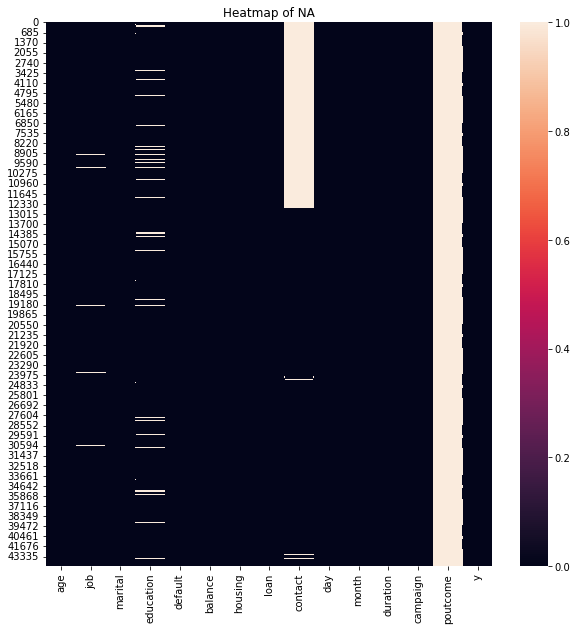

In [1327]:
# Displaying the new NaNs on a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())
plt.title('Heatmap of NA')
plt.show()

In [1328]:
# Displaing the Percentage of missing data per column in decimal form
missing_col_per = pd.DataFrame([(df[col].isnull().sum()/df.shape[0]) for col in df.columns] , df.columns, columns=['Percent_Missing'])
missing_col_per

,Percent_Missing
age,0.000000
job,0.006900
marital,0.000000
education,0.041511
default,0.000000
balance,0.000000
housing,0.000000
loan,0.000000
contact,0.350436
day,0.000000


Since we removed all the clients that had been placed in a campaign before we now get 100% of the Poutcome column as unknown. Meaning that this column can be dropped. Below we set up the threshold for dropping a column as over 80% missing. This will end up taking contact and poutcome out of the equation.

In [1329]:
# Setting the limit for dropping
drop_lim = df.shape[0] * .8
df_1 = df.dropna(thresh=drop_lim, axis=1)

In [1330]:
# Displaying the New Columns to be used
df_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [1331]:
# Displaying the count of the NaN's in the dataframe
df_1.isna().sum()

age             0
job           255
marital         0
education    1534
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
y               0
dtype: int64

In [1332]:
# Showing the number of unique values
df_1.nunique()

age            76
job            11
marital         3
education       3
default         2
balance      7058
housing         2
loan            2
day            31
month          12
duration     1525
campaign       48
y               2
dtype: int64

There are a few NaN's still present in the data set but they don't leave enough of a mark on the data to warrent removing the entire column. Instead I will just remove these rows. 

Some brief data visualization is needed to get a full understanding of the data that we have collected. I used bar graphs as they help show distributions from a high level analysis point. The first graph helps show us that there is an imbalance on the outcome variable. This will get dealt with later on during the preprocessing portion to help create a balanced  data set for the training model.

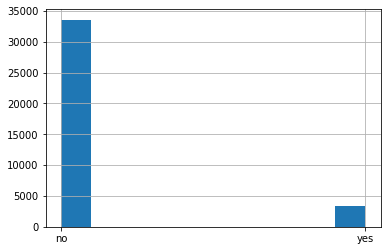

In [1333]:
# Y variable
df_1['y'].hist()
plt.show()

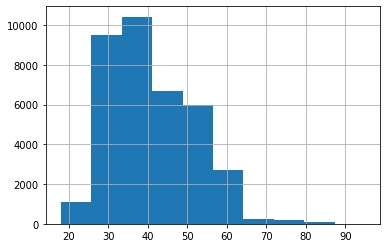

In [1334]:
# Age
df_1['age'].hist()
plt.show()

The distribution of the Yes to the No in the Y variable is a bit concerning for our test. We will have to resample the no and maybe do some cross validation to bring this more to an even set.

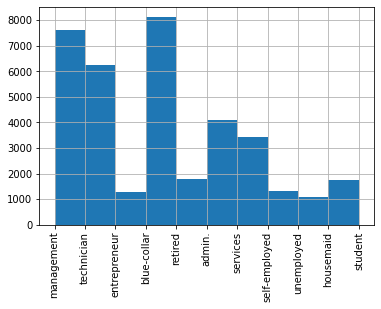

In [1335]:
# Job
df_1['job'].hist()
plt.xticks(rotation=90)
plt.show()

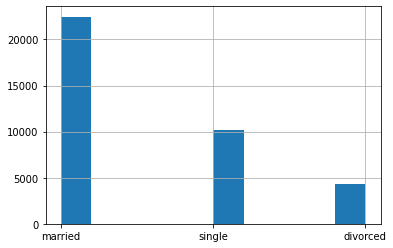

In [1336]:
# Marital status
df_1['marital'].hist()
plt.show()

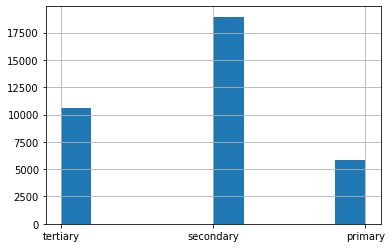

In [1337]:
# Education
df_1['education'].hist()
plt.show()

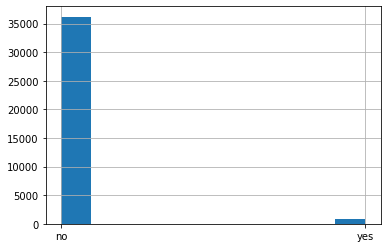

In [1338]:
# Default
df_1['default'].hist()
plt.show()

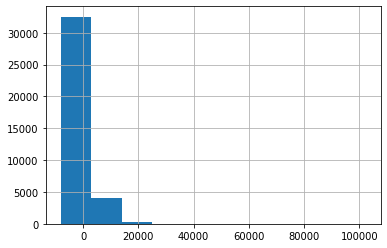

In [1339]:
# Balance
df_1['balance'].hist()
plt.show()

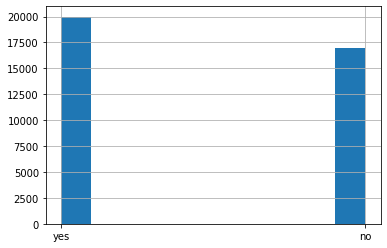

In [1340]:
# Housing
df_1['housing'].hist()
plt.show()

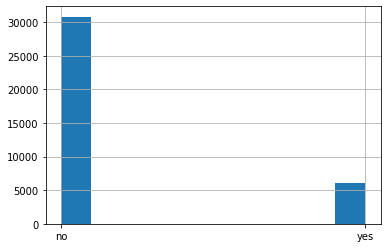

In [1341]:
# Loan
df_1['loan'].hist()
plt.show()

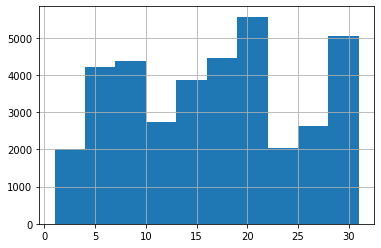

In [1342]:
# Day
df_1['day'].hist()
plt.show()

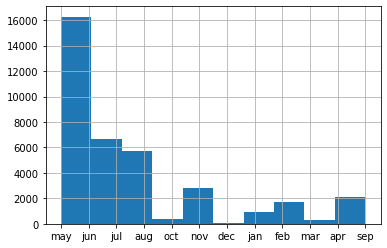

In [1343]:
# Month
df_1['month'].hist()
plt.show()

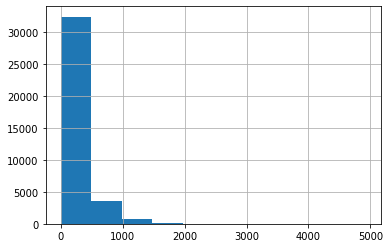

In [1344]:
# Duration
df_1['duration'].hist()
plt.show()

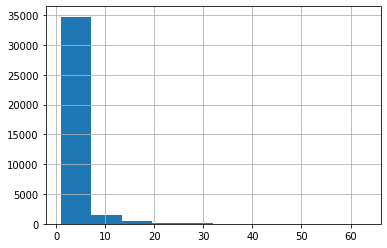

In [1345]:
# Campaign
df_1['campaign'].hist()
plt.show()

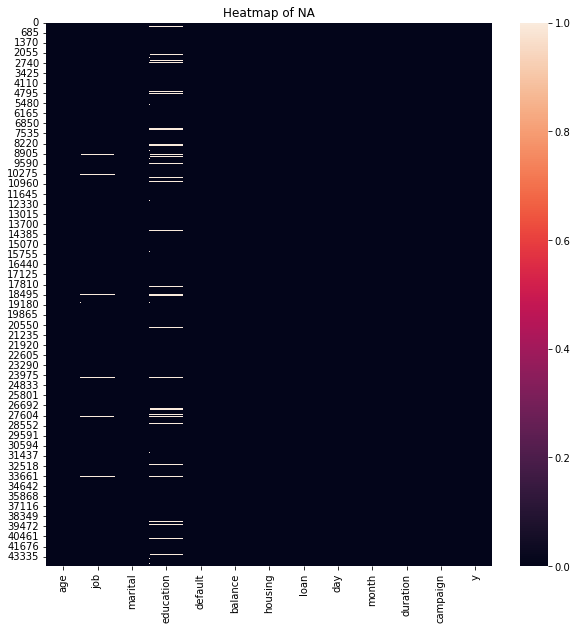

In [1346]:
# Displaying the new NaNs on a heatmap, now that the columns have been removed
plt.figure(figsize=(10,10))
sns.heatmap(df_1.isna())
plt.title('Heatmap of NA')
plt.show()

# 3. Data Preprocessing


## This is where I perform functions such as iumputing / dropping missing data,scaling features, mapping categorical labels, feature selection / extraction to select relevant features and reduce the dimensionality of the training examples. 



- The Extraction methods chosen for preprocessing data will depend on the ML algorithms intended to use, the state of the training examples collected

Yes. The extraction methods will be different for the different algorithms. This is why I have set up seperate functions for preprocessing and training modeling. That way I can select or create the preprocessing that I would like to conduct.

For instance Decision trees and random forests do not require feature scaling, but it is recommend for K-nearest neighbors to help minimize distortion from the Eucliean distance measurments. Logistic Regression also requires normalization.

- A requirement of the project will be to address each category of data preprocessing stated above, describe the reasons for whether you used a given preprocessing technique or not.

The data first starts with are either integers or objects. In the case of columns y, loan, and default. These were integer objects that were turned into category types with binary encoding. For the rest of the integers, I decided to use the minmaxscaler to help normalize the data. For the Other objects I used one hot encoding to help relay the categorical element.

- At least Three of the features must require some form of data preprocessing

Everyone of the columns goes through a type of transformation, wether one hot encoding or minmax scaling for normalization.

- Data cannot be "Turn-Key" for training

The Data is rather clean, but not completely turn key because we have to transform all of the categorical variables and deal with the unknown data entries. There are also imbalanced categorical variables that needed to be handled.

- NOTE regardless of wether the features can ultimately be reduced via feature selection techniques or not, it's a requirement that you perform feature selection analysis to determine the relative importance of each feature and decide which features should be included in the model

Some of the features where immedialely dropped from the vary begining, such as Poutcome and contact. They did not meet the 80% of complete data threshold. Other features were removed during features selection.

I then used the random rainforest to do some feature importance to help with my feature selection. It is here that I determined to drop 'day', 'balance', 'education', 'default' columns. 

- After preprocessing the data, check examples to ensure your training dataset is balanced

The data sets was definitely not balanced from the begining. It is for this reason that I decided to use Sklearns resampling to help go through and edit the different variables. 

- Remove examples with missing fields, or instances, could reulst in a training dataset that is unbalanced if one class label was more likely to be missing a particular feature.

Columns with too many missing fields were removed. Other columns that had missing fields just how those rows dropped.

- If you find yourself in the situation of having inbalanced dataset after preprocessing your data, consider alternative methods of preprocessing such as creating fake values or dropping the feature altogher. These kinds of decisions are precisely what I want described in the write up inside the note book.

The data was imbalanced after preprocessing. It is for this reason that I used resampling for the training data sets. When I replaced the education column nans with the most frequent occuring strategy I was a bit concernted. But thankfully the feature selection ruled this out. Though it should be noted that placing in the most frequent values into the education could have varied the response for the feature importance.

In [1347]:
# Displaying the D Types
df_1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [1348]:
# Counting to see how many columns have NaN values
print("# Columns w/ NaN", df_1.isnull().any().sum())
display(df_1.isna().sum())

# Columns w/ NaN 2


age             0
job           255
marital         0
education    1534
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
y               0
dtype: int64

There are a considerable amount of NaN's in the education column - 4.5% as displayed above. For this column I decided to impute the value as it could lead to some bias. To conduct this I use the sklearn.impute class simpleImputer to replace this categorical features. The stategy that was used to impute these falues was 'most requent'. It must be noted that this could skew the model toward the most requent education set.

For job, I have decided to go with partial deletion as there is a very small set with missing data. Less than 1% of the data is deleted for this category.

In [1349]:
# Imputing the value for the educational missing values
df_2 = df_1.copy()

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer = imputer.fit(df_1.loc[:, df_1.columns == 'education'])
new_education = imputer.transform(df_1.loc[:, df_1.columns == 'education'])

# Replacing education with the newly imputed values
df_2['education'] = new_education.tolist()

Now that the values have been imputed for education. I will just drop the rest  of rows that possess NaN values. These only exist in the job column.

In [1350]:
# Simple Drop of NaN rows
df_2 = df_1.dropna()
df_2 = df_2.copy()
print('# Columns w/ Nan')
df_2.isnull().any().sum()

# Columns w/ Nan


0

In [1351]:
df_2['job'].isnull().sum()

0

Note that only two columns had any NaNs those rows have been dealt with we will consider df_2 the main data frame.

There are three different columns that have two classiciations. These are default, housing, loan, and of course Y. We can turn all of theses in to binary. I will also map all the other categorical variables to integer values.

In [1352]:
# Cleanding up some values to make coding better
df_2['job'] = df_2['job'].replace(['blue-collar'], 'blue_collar')
df_2['job'] = df_2['job'].replace(['self-employed'], 'self_employed')
df_2['job'] = df_2['job'].replace(['admin.'], 'admin')

In [1353]:
# Gathering the different columns that are objects
obj_cols = [col for col in df_2 if df_2[col].dtype == 'object']

# Mapping the respective columns to binary
df_2['y'] = df_2.y.map(dict(yes=1, no=0))
df_2['default'] = df_2.default.map(dict(yes=1, no=0))
df_2['loan'] = df_2.loan.map(dict(yes=1, no=0))

# Also mapping the different categorical variables
df_2['education'] = df_2.education.map(dict(primary=0, secondary=1, tertiary=2))
df_2['housing'] = df_2.housing.map(dict(no=0, yes=1))
df_2['job'] = df_2.job.map(dict(admin=11, blue_collar=1, entrepreneur=2,
                                housemaid=3, management=4, retired=5,
                                self_employed=6, services=7, student=8,
                                technician=9, unemployed=10))
df_2['marital'] = df_2.marital.map(dict(divorced=0, married=1, single=2))

df_2['month'] = df_2.month.map(dict(jan=1, feb=2,mar=3, apr=4,
                                    may=5, jun=6, jul=7, aug=8, sep=9,
                                    oct=10, nov=11, dec=12))

# Displaying the transformation
df_2.head(20)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,5,5,261,1,0
1,44,9,2,1,0,29,1,0,5,5,151,1,0
2,33,2,1,1,0,2,1,1,5,5,76,1,0
5,35,4,1,2,0,231,1,0,5,5,139,1,0
6,28,4,2,2,0,447,1,1,5,5,217,1,0
7,42,2,0,2,1,2,1,0,5,5,380,1,0
8,58,5,1,0,0,121,1,0,5,5,50,1,0
9,43,9,2,1,0,593,1,0,5,5,55,1,0
10,41,11,0,1,0,270,1,0,5,5,222,1,0
11,29,11,2,1,0,390,1,0,5,5,137,1,0


Now that I have turned these columns into binary I will cast the objects into categorical variables to help with onehot encoding.

In [1354]:
# Casting in to category
for col in df_2.columns:
  if col in obj_cols:
    df_2[col] = df_2[col].astype('category')

# Changing the binary fields into categories to be used in the models later
df_2['y'] = df_2['y'].astype('category')
df_2['loan'] = df_2['loan'].astype('category')
df_2['default'] = df_2['default'].astype('category')

# Displaying the new data types.
df_2.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
day             int64
month        category
duration        int64
campaign        int64
y            category
dtype: object

In [1355]:
# Displaying the head of the data
df_2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,5,5,261,1,0
1,44,9,2,1,0,29,1,0,5,5,151,1,0
2,33,2,1,1,0,2,1,1,5,5,76,1,0
5,35,4,1,2,0,231,1,0,5,5,139,1,0
6,28,4,2,2,0,447,1,1,5,5,217,1,0


Now setting up a data pipeline to transform the data. Both the objects/categories and the integers. Because I plan on doing a bit of feature selection down the line. I will set up a data pipline within a function that is aimed at preprocessing the data. This way if I performa forward of backward selection model it will be easier to edit through.

It should be noted that df_2 is now primed for Decision Trees or Randomforest.
And the function below is set up to scale the data for algorithms such as KNN and Logistic Regression. By using scaled data it will reduce bias.

Additionally the function below switched the data types for y, loan, default to make sure they dont go through unwanted transformations

In [1356]:
def transform_df(df):
  """This Function is set up to make it easy to transform the data if different
   columns are missing"""
  
  # Changing the following to int so they dont get dummies
  df['y'] = df['y'].astype('int64')
  df['loan'] = df['loan'].astype('int64')
  df['default'] = df['default'].astype('int64')

  # Gathering Dummies for the 
  df_t = pd.get_dummies(data=df, columns=[col for col in df if df[col].dtype == 'category'])
  
  # Flipping the y, loan, default back to category so they dont get scaled
  df_t['y'] = df_t['y'].astype('category')
  df_t['loan'] = df_t['loan'].astype('category')
  df_t['default'] = df_t['default'].astype('category')

  
  # Scaling all the integer data with the MinMaxScaler()
  scaler = MinMaxScaler()
  s_cols = [col for col in df_t if df_t[col].dtype == 'int64']
  df_t[s_cols] = scaler.fit_transform(df_t[s_cols])


  return df_t

Note that df_3 is a full feature data set. It is just shown below to display that one hot encoding is actually taking place. and that scalling is being conducted.

In [1357]:
# Displaying what the newly transformed data looks like
df_3 = transform_df(df_2)
display(df_3.head())
display(df_3.dtypes)

,age,default,balance,loan,day,duration,campaign,y,job_1,job_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.519481,0,0.092259,0,0.133333,0.053070,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.337662,0,0.073067,0,0.133333,0.030704,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.194805,0,0.072822,1,0.133333,0.015453,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0.220779,0,0.074901,0,0.133333,0.028264,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0.129870,0,0.076862,1,0.133333,0.044124,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


age             float64
default        category
balance         float64
loan           category
day             float64
duration        float64
campaign        float64
y              category
job_1             uint8
job_2             uint8
job_3             uint8
job_4             uint8
job_5             uint8
job_6             uint8
job_7             uint8
job_8             uint8
job_9             uint8
job_10            uint8
job_11            uint8
marital_0         uint8
marital_1         uint8
marital_2         uint8
education_0       uint8
education_1       uint8
education_2       uint8
housing_0         uint8
housing_1         uint8
month_1           uint8
month_2           uint8
month_3           uint8
month_4           uint8
month_5           uint8
month_6           uint8
month_7           uint8
month_8           uint8
month_9           uint8
month_10          uint8
month_11          uint8
month_12          uint8
dtype: object

## Imbalanced Testing Data

Now that we have a transforming method it is time to start looking at if we have equally weight output labels. We do not. Therefore, the next steps are going to be aimed at evening out this training data set. The method that is used is resampling. This is done by over sampling the with replacement until the client respondants with yes is equal to that of those saying no. (1,0)

In [1358]:
# Showing the imbalance with the classification variable
display(df_3['y'].value_counts())

0    32059
1     3222
Name: y, dtype: int64

In [1359]:
def train_data_w_resample(df):
  """This function is aimed at creating test train that has balanced classes"""
  df_maj = df[df['y'] == 0]
  df_min = df[df['y'] == 1]

  # Finding the number of samples that we need for a 50/50 Split
  sample_num = len(df_maj)

  df_min_upsample = resample(df_min, replace=True, n_samples=sample_num, 
                             random_state=42)

  df_unsampled = pd.concat([df_maj, df_min_upsample])

  return df_unsampled

In [1360]:
def train_data(df):
  """This Function is set up to help make it easier to pass
  different datasets through for training. It also uses 
  resampling"""

  # Dividing up x and y
  X_all = df.loc[:, df.columns != 'y']
  Y_all = df.loc[:, df.columns == 'y']

  # creating a train and test set
  x_train, x_test, y_train, y_test = train_test_split(
      X_all, Y_all, test_size=0.2, random_state=42, stratify=Y_all, shuffle=True)
  
  # Back up line incase I need to turn y into an array
  # X_all, Y_all.values.ravel(), test_size=0.2, random_state=42, stratify=Y_all)
  
  return x_train, x_test, y_train, y_test

In [1361]:
# Showing a test of training df_3
x_train_1, x_test_1, y_train_1, y_test_1 = train_data(df_3)
y_train_1.value_counts()

y
0    25646
1     2578
dtype: int64

In [1362]:
# Sending off the x and y training samples to get resampled
df_train = pd.concat([x_train_1.reset_index(drop=True), y_train_1.reset_index(drop=True)], axis=1)
train_resampled = train_data_w_resample(df_train)

# Splitting the data back up in to the test and training sample for
# The models to be used later
x_train_re = train_resampled.loc[:, train_resampled.columns != 'y']
y_train_re = train_resampled.loc[:, train_resampled.columns == 'y']

In [1363]:
# Showing how the data has now been resampled to create equal outputs
y_train_re.value_counts()

y
0    25646
1    25646
dtype: int64

## Feature Selection Analysis
One of the requirements is to perform some feature selection. Below are a few methods that are used for determining the feature select.

I will use the random forest for features selection. Because Random forest does not need one hote encoded or scaled data I will use. df_2. Random Forest does not perform well with unbalanced data. Therefore I will use the training test balancing above. df_3 is actually a fully one hot encoded and scaled. Where df_2 has numeric label encoding, but has not been scaled or one hot encoded.

In [1364]:
# Creating Balanced Training set of DF_2
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_data(df_2)
df_rf_train = pd.concat([x_train_rf.reset_index(drop=True), y_train_rf.reset_index(drop=True)], axis=1)
train_rf_resampled = train_data_w_resample(df_rf_train)
x_train_rf_re = train_rf_resampled.loc[:, train_rf_resampled.columns != 'y']
y_train_rf_re = train_rf_resampled.loc[:, train_rf_resampled.columns == 'y']

In [1365]:
# Note that this code closely follows the book Random forest feature selection

# Gathering Labels
rf_labels = train_rf_resampled.columns[1:]

# Creating the RandomForest with 500 estimators
forest = RandomForestClassifier(n_estimators=500, random_state=42)

# Training the model
forest.fit(x_train_rf_re, y_train_rf_re.values.ravel())

# Gathering the importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Printing the Results
for f in range(x_train_rf_re.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, rf_labels[indices[f]], importances[indices[f]]))

 1) campaign                       0.453697
 2) duration                       0.098869
 3) housing                        0.096995
 4) job                            0.095857
 5) month                          0.088555
 6) marital                        0.040854
 7) y                              0.038455
 8) loan                           0.036382
 9) default                        0.019754
10) education                      0.018124
11) day                            0.010853
12) balance                        0.001606


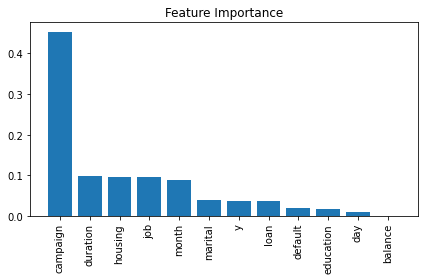

In [1366]:
# Graphing the Feature Importance
plt.title("Feature Importance")
plt.bar(range(x_train_rf_re.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train_rf_re.shape[1]), rf_labels[indices], rotation=90)
plt.xlim(-1, x_train_rf_re.shape[1])
plt.tight_layout()

After looking at the feature imporance for y. It becomes apparent that
we can drop balance, day, eduction, loan, default. Educationally especially
because we imputed certain values. These are surprising results for seeing that balance is not a factor. On the other side it is not surprising to see that day is not a factor. It is also surprising to see that loan and default are not higher factors, but that the campaign and the duration are actually big contributing factors.

The next bit of code will be removing these variables for df_4. I will also make a training set that has one hot encoding for the remaining models.


In [1367]:
df_4 = df_2.drop(['day', 'balance', 'education', 'default'], axis=1).copy()
df_4.head()

,age,job,marital,housing,loan,month,duration,campaign,y
0,58,4,1,1,0,5,261,1,0
1,44,9,2,1,0,5,151,1,0
2,33,2,1,1,1,5,76,1,0
5,35,4,1,1,0,5,139,1,0
6,28,4,2,1,1,5,217,1,0


In [1368]:
# Creating Balanced Training set of DF_4
# Also creating a one hot encoding
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_data(df_4)
df_fs_train = pd.concat([x_train_fs.reset_index(drop=True), y_train_fs.reset_index(drop=True)], axis=1)
train_fs_resampled = train_data_w_resample(df_fs_train)
x_train_fs_re = train_fs_resampled.loc[:, train_fs_resampled.columns != 'y']
y_train_fs_re = train_fs_resampled.loc[:, train_fs_resampled.columns == 'y']

# 4. Model Comparison

## This is where I will implement and compare the performance of at least three different classification algorithms to determine which model best fits the training and test data collected. 
- A description of the performance of each model (using an evaluation criteria such as classification accurcy) is required for this section as well as an overall decision as to which model is the best choiuce for the problem domain
-NOTE: the preceptron is not allowed to be one of the models you compare for this projec, as there are better algorithms available to you with similar functionality

## Model 1: Logistic Regression

In [1369]:
# Model Code 1: Logistic Regression
logistic_eval = Pipeline(steps=[('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))])
logistic_eval.fit(x_train_fs_re, y_train_fs_re.values.ravel())

# Printing the accuracy of the test
display("Training score:", round(logistic_eval.score(x_train_fs_re, y_train_fs_re)*100,2))
display("Testing score:", round(logistic_eval.score(x_test_fs, y_test_fs)*100,2))

'Training score:'

79.65

'Testing score:'

81.62

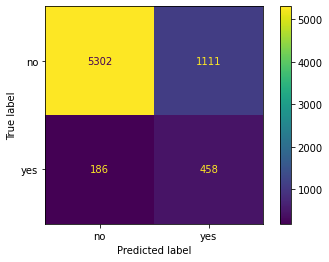

In [1370]:
#  Creating Predictions for the logistic regression
y_logistic_pred = logistic_eval.predict(x_test_fs)

# Creating a confusion matrix to look at different Scores
conf_matrix_log = confusion_matrix(y_test_fs, y_logistic_pred)

# Displaying the Confusion Matrix
log_labels = ['no','yes']
ConfusionMatrixDisplay(conf_matrix_log, display_labels=log_labels).plot()
plt.show()

In [1371]:
# Computing the precision, recall, and f1 scores for the Logistic Regresion
display("Precision Score: ", precision_score(y_true=y_test_fs, y_pred=y_logistic_pred))
display("Recall Score: ", recall_score(y_true=y_test_fs, y_pred=y_logistic_pred))
display("F1 Score:", f1_score(y_true=y_test_fs, y_pred=y_logistic_pred))

'Precision Score: '

0.29190567240280435

'Recall Score: '

0.7111801242236024

'F1 Score:'

0.4139177586985992

## Model 2: K-Nearest Neighbour

To start the K-Nearest Neighbour I will use K means to determine where the elbow is to figure out how many clusters I want to use. It is a bit crude, but better than just guessing.

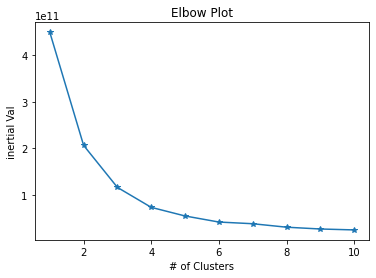

In [1372]:
# Using the Elbow Method for determining the Number of Clusters
kmeans_kwargs = {"init":"random", "n_init": x_train_rf_re.shape[1], "max_iter":500, "random_state":42}

# Setting up lists to hold the SS Values
# Setting up a list to hold SSE Values
clusters = []
inertia_vals = []

# Looping through the different amounts of values
for k in range(1,11):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(x_train_rf_re)
    clusters.append(km.inertia_)

    # Appending model to cluster list
    clusters.append(km)
    inertia_vals.append(km.inertia_)

# plot the inertia vs K values
plt.plot(range(1,11), inertia_vals, marker='*')
plt.xlabel('# of Clusters')
plt.ylabel('inertial Val')
plt.title('Elbow Plot')
plt.show()

The Elbow looks to be at 4 clusters.

In [1373]:
# Model Code 2: K-Nearest Neighbour
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(x_train_fs_re, y_train_fs_re.values.ravel())

# Printing the accuracy of the test
display("Training score:", round(knn_classifier.score(x_train_fs_re, y_train_fs_re)*100,2))
display("Testing score:", round(knn_classifier.score(x_test_fs, y_test_fs)*100,2))

'Training score:'

96.88

'Testing score:'

84.67

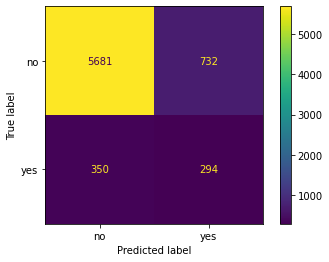

In [1374]:
#  Creating Predictions for the logistic regression
y_knn_pred = knn_classifier.predict(x_test_fs)

# Creating a confusion matrix to look at different Scores
conf_matrix_knn = confusion_matrix(y_test_fs, y_knn_pred)

# Displaying the Confusion Matrix
log_labels = ['no','yes']
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=log_labels).plot()
plt.show()

In [1375]:
# Computing the precision, recall, and f1 scores for the KNN
display("Precision Score: ", precision_score(y_true=y_test_fs, y_pred=y_knn_pred))
display("Recall Score: ", recall_score(y_true=y_test_fs, y_pred=y_knn_pred))
display("F1 Score:", f1_score(y_true=y_test_fs, y_pred=y_knn_pred))

'Precision Score: '

0.28654970760233917

'Recall Score: '

0.45652173913043476

'F1 Score:'

0.35209580838323357

## Model 3: Decision Tree

It must be noted that for the decision tree I use the same training and testing that the random rain forrest did above. The reason for this was to not enclude scaling or one hot encoding. 

In [1376]:
# Model Code 3: Decision Tree
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)
tree_model.fit(x_train_rf_re, y_train_rf_re)

# Printing the accuracy of the test
display("Training score:", round(tree_model.score(x_train_rf_re, y_train_rf_re)*100,2))
display("Testing score:", round(tree_model.score(x_test_rf, y_test_rf)*100,2))

'Training score:'

85.54

'Testing score:'

82.17

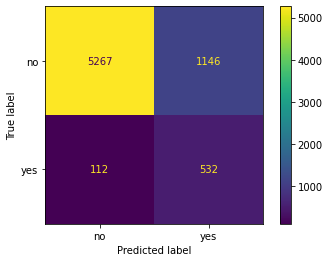

In [1377]:
#  Creating Predictions for the logistic regression
y_tree_pred = tree_model.predict(x_test_rf)

# Creating a confusion matrix to look at different Scores
conf_matrix_tree = confusion_matrix(y_test_rf, y_tree_pred)

# Displaying the Confusion Matrix
log_labels = ['no','yes']
ConfusionMatrixDisplay(conf_matrix_tree, display_labels=log_labels).plot()
plt.show()

In [1378]:
# Computing the precision, recall, and f1 scores for the Decision Tree
display("Precision Score: ", precision_score(y_true=y_test_rf, y_pred=y_tree_pred))
display("Recall Score: ", recall_score(y_true=y_test_rf, y_pred=y_tree_pred))
display("F1 Score:", f1_score(y_true=y_test_rf, y_pred=y_tree_pred))

'Precision Score: '

0.3170441001191895

'Recall Score: '

0.8260869565217391

'F1 Score:'

0.458225667527993

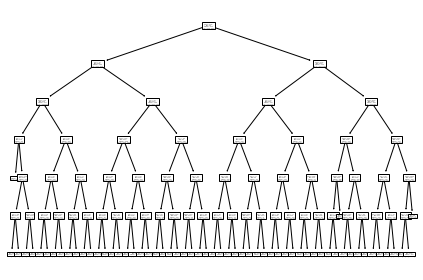

In [1379]:
tree.plot_tree(tree_model)
plt.tight_layout()
plt.show()

## Model Evaluation
- A description of the performance of each model with the use of a evaluation criteria such as classiciation accuray. 

Each of the models performed rather well in predicting wether or not a client subscribed to a term deposit. 

The First model descriptions are for the feature selected data set. For the Logistic regression and KNN the data was one hot encoded and normalized. For the decision tree the balanaced data was used, but there was no encoding. Do note that some of the data columns are categorized as categories not integers, even though they appear as numbers

* The Logistic Regression  scored a training accuracy score of 79.65 on the training set and performed slightly better on the testing data, with an 81.62.
Precision Score: 29.2%
Recall Score: 71.1%
F1 Score: 41.4% 

* For KNN the training data set scored a 96.88 accuracy score, with a 84.67 Testing score. 
Precision Score: 28.6%
Recall Score: 45.6%
F1 Score: 35.2%

* For the Decision tree the training accuracy score of 85.54 was higher than the testing score of 82.17
Precision Score: 37.7%
Recall Score: 82.6%
F1 Score: 45.8%

True Positives: KNN had the most with 5681; lease logistic regression 5302
False Postives: KNN had the most with 447; least decision tree 112
True Negatives: Decision Tree 532; lease KNN  294
False Negatives: Decision Tree 1146; least KNN 732


- Over all decision on which model is the best choise for your problem domain
Based upon the accuracy and looking at the confusion matrix. I would choose the decision tree model. The reason for this is that it predicts the most true negatives. We are trying to see who subscribed the most. Meaning that we want the most predictions on the true negatives. The accuracy of 82.17 is lower than the KNN model of 84.67 but KNN had the least amount of true negatives predicted. The Decision tree is also the east of the models to describe to business people. That is why I recommend this model. 

Looking into other scores. The Decision Tree had the highest precision score. Meaning that it predicted the most positive correcly. With KNN once again scoring the loweres. When looking at the Recall score the decision tree also scored the highest with a 37.7% Meaning that it predicted the most positives out actual positives. Then the combined measurement score of F1 also had the Decision tree scoring the best. It is for all these reasons that I stick with my recomendation for using the decision tree.


# 5. Experiment Summary


## Results of the experiment are summarized below.
- How did I have to collect data? How was the data preprocessed?

The data was collected from the UC-Irvine Machine Learning Repository. I used !wget download the data set. I scrubbed out any person that was involved in another campaign. This was done by looking at the values for poutcome and pdays. After removing clients/rows that had positive values in these columns I removed the columns themselves. When looking for null values I realized that the data had these stored as 'unknown' so I switched the values to NaN to beable to view and handle with more ease. I then looked at the different null values that existed. The contact column did not meet the 80% threshold so I removed this column. After this I looked in to the remaining null values. There was a considerate amount for education so I used the sklearn simpleimputer to give this values using the most frequent strategy. Thankfully this whole column gets removed later. After imputing the education NaNs I removed any of the rows that had NaN values remains, these were in the job column. I then mapped over all the categorical columns to numerical representations. This provided some difficulty at first because I had to replace the values for blue-collar, self-employed and admin.


This processes left me with a dataframe that was suitable to be used for both the random rainforest and for the decision tree. Only the next problem was that the data outcome variable was unbalanced. I then used resampling to get a 50/50 split on the training data. I also created a function that transformed the data to include both normalization using the minmax function and then one hot encoded the categorical columns.


Feature selection was then performed using Random Rainforrest on the resampled data. This produced the most surprising results. Campaign had the most feature importance while balance had the lowests. I used the feature importance to then removed the following columns: loan, default, education, day, and balance.

- What models where compared?

The models that were compared were Logistic Regression, KNN, and Decision tree.
The model that I decided that was best the decision tree. It produced the most true negatives. Which in this case means the most people that signed up for the campaign.

- Which Model performed the best

Determining which model performed the best is left up to interpretation. Technically KNN had the highest accuracy. But the Decision tree performed best for using the machine learning model in a business environment. It predicted the most true negatives. There is a lengthier description on the model performance up above.

- Was I able to model the data accurately in the way I was hoping when I started the project?

Yes I was able to model the data accurately in a way that I was hoping for when I started the project. However I was not expacting the feature importance results. I would have though that balance would have been more of a determining factor, as well as loan, default and education.

- What did I learn during the process

During the process I learned that it is hard to choose data sets randomly. At first I also learned that it is interesting completing the preprocessing of data and trying to make training and test sets. I had a lot of trouble when conducting the mapping, but that turned out to just being a simple mistake in the code that kept reseting the data. I learned that the different models can require different data preprocessing such as the difference between KNN and Decision Tree data sets. I spent sometime not using pipeline completely so that I could see the transformation of the data happen. I was have never completed resampling. This was an aspect of the project that I found interesting, but want to continue to expand upon and learn more K-folds cross validation techniques. 
